In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# The tech stocks we'll use
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-04-28,2373.500000,2306.000000,2372.100098,2314.080078,5269400.0,2314.080078,AMAZON
2020-04-29,2391.889893,2310.000000,2330.010010,2372.709961,4591600.0,2372.709961,AMAZON
2020-04-30,2475.000000,2396.010010,2419.840088,2474.000000,9534600.0,2474.000000,AMAZON
2020-05-01,2362.439941,2258.189941,2336.800049,2286.040039,9772600.0,2286.040039,AMAZON
2020-05-04,2326.979980,2256.379883,2256.379883,2315.989990,4865900.0,2315.989990,AMAZON
2020-05-05,2351.000000,2307.129883,2340.000000,2317.800049,3242500.0,2317.800049,AMAZON
2020-05-06,2357.449951,2320.000000,2329.439941,2351.260010,3117800.0,2351.260010,AMAZON
2020-05-07,2376.000000,2343.110107,2374.780029,2367.610107,3396400.0,2367.610107,AMAZON
2020-05-08,2387.239990,2357.000000,2372.139893,2379.610107,3206600.0,2379.610107,AMAZON


In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,167.836548,164.682968,166.175413,166.348468,3.522875e+07,161.215537
std,56.191205,54.725397,55.321008,55.560436,1.731610e+07,57.411931
min,91.669998,89.470001,90.000000,90.339996,1.136200e+07,84.962914
25%,117.414999,115.627499,116.507498,116.382504,2.373000e+07,109.519762
50%,160.710007,158.010002,159.305000,159.594994,3.097575e+07,153.821083
75%,199.945004,196.419998,198.549995,198.630001,4.153912e+07,195.914440
max,327.850006,323.350006,324.739990,327.200012,1.622063e+08,326.316681


In [5]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,977.970356,960.369668,969.085687,969.582015,1.724805e+06,969.582015
std,234.164203,229.307709,231.421545,231.959675,8.655697e+05,231.959675
min,522.734009,515.179993,519.500000,516.830017,3.475000e+05,516.830017
25%,769.650009,755.799988,764.424988,762.505005,1.211275e+06,762.505005
50%,1024.010010,992.779999,1004.980011,1005.809998,1.488950e+06,1005.809998
75%,1160.870026,1139.445007,1147.567474,1152.274994,1.971500e+06,1152.274994
max,1532.105957,1521.400024,1525.069946,1526.689941,1.116490e+07,1526.689941


In [6]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,90.593056,88.897976,89.773706,89.797944,2.966625e+07,87.127742
std,37.714546,36.769712,37.267652,37.276107,1.454616e+07,38.479525
min,42.590000,39.720001,40.450001,40.470001,7.425600e+06,36.970531
25%,57.255000,56.317500,56.695001,56.877501,2.067858e+07,53.275614
50%,83.560001,82.715000,83.110001,83.045002,2.588105e+07,79.959743
75%,113.102501,111.302502,112.137503,112.192499,3.362248e+07,110.309847
max,190.699997,186.470001,190.649994,188.699997,1.352271e+08,188.185989


In [7]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,1245.156817,1219.625437,1233.201603,1233.103474,4.314502e+06,1233.103474
std,547.165804,534.477572,541.027805,541.165563,2.226968e+06,541.165563
min,426.799988,418.359985,420.600006,421.709991,8.813000e+05,421.709991
25%,758.445007,746.132507,753.377502,752.099991,2.823375e+06,752.099991
50%,1127.515015,1112.270020,1115.984985,1121.915039,3.708350e+06,1121.915039
75%,1780.595001,1745.627502,1765.477509,1764.860016,5.086750e+06,1764.860016
max,2475.000000,2396.010010,2443.199951,2474.000000,2.190940e+07,2474.000000


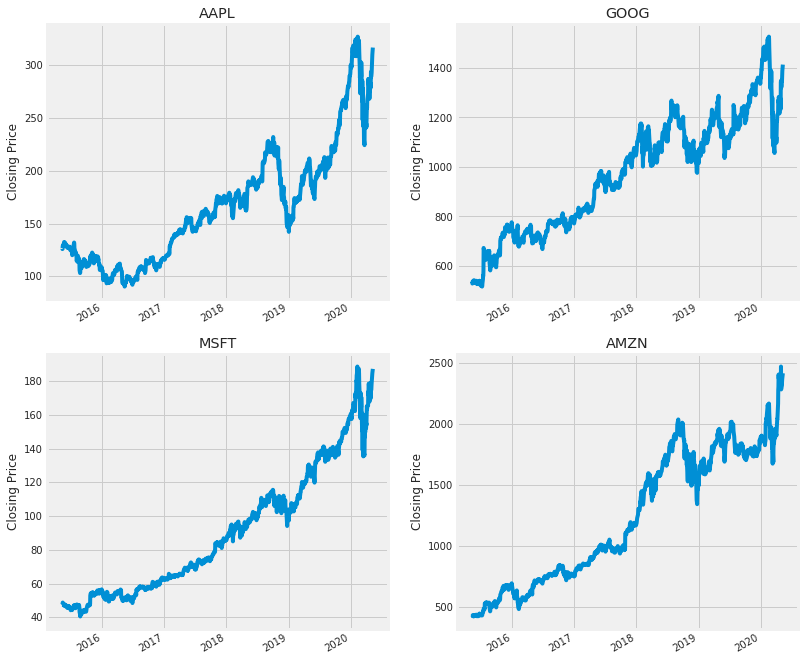

In [8]:
# historical view of closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Closing Price')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

**AAPL PRICE**

In [9]:
## predict AAPL Price

data = AAPL.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len


1008

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_aapl = scaler.fit_transform(dataset)
scaled_aapl

array([[0.15190408],
       [0.15000424],
       [0.1505953 ],
       ...,
       [0.90095406],
       [0.92793209],
       [0.95634425]])

In [11]:
#create train data set
train_data = scaled_aapl[0:int(training_data_len), :]
aapl_x_train = []
aapl_y_train = []

for i in range(60, len(train_data)):
    aapl_x_train.append(train_data[i-60:i, 0])
    aapl_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
aapl_x_train, aapl_y_train = np.array(aapl_x_train), np.array(aapl_y_train)
#Reshape the data
aapl_x_train = np.reshape(aapl_x_train, (aapl_x_train.shape[0], aapl_x_train.shape[1], 1))
print(aapl_x_train.shape, aapl_y_train.shape)


(948, 60, 1) (948,)


In [12]:
import re
import tensorflow as tf
from sklearn.preprocessing  import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [18]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (aapl_x_train.shape[1], 1)))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80,activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'tanh'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 10, batch_size = 6)

Epoch 1/10
948/948 [==============================] - 20s 21ms/step - loss: 0.0055
Epoch 2/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0023
Epoch 3/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0022
Epoch 4/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0016
Epoch 5/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0014
Epoch 6/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0013
Epoch 7/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0011
Epoch 8/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0013
Epoch 9/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0011
Epoch 10/10
948/948 [==============================] - 19s 20ms/step - loss: 0.0010


In [19]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 60)            14880     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 80)               

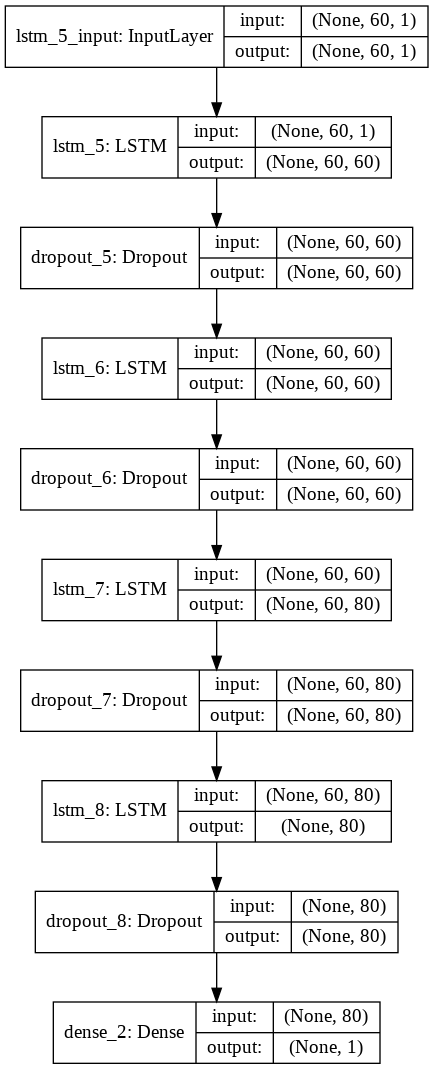

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(regressor, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
#create test data set
test_data = scaled_aapl[training_data_len - 60: , :]
#Create the data sets x_test and y_test
aapl_x_test = []
aapl_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    aapl_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
aapl_x_test = np.array(aapl_x_test)
aapl_x_test = np.reshape(aapl_x_test, (aapl_x_test.shape[0], aapl_x_test.shape[1], 1 ))
aapl_pred = regressor.predict(aapl_x_test)
aapl_pred = scaler.inverse_transform(aapl_pred)


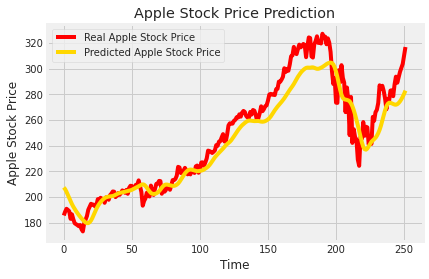

In [22]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(aapl_pred, color = 'gold', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


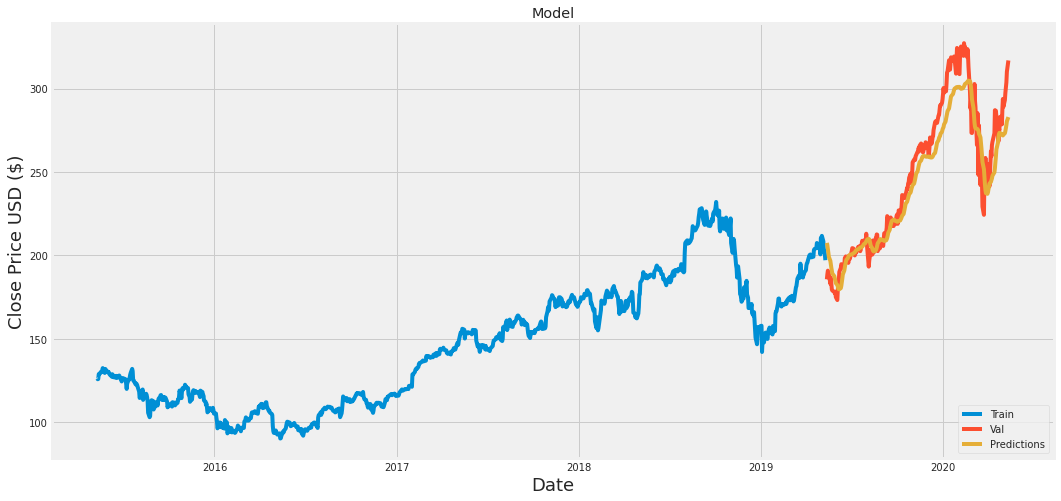

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = aapl_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
valid

,Close,Predictions
Date,,
2019-05-13,185.720001,207.537140
2019-05-14,188.660004,206.156631
2019-05-15,190.919998,204.119171
2019-05-16,190.080002,201.699631
2019-05-17,189.000000,199.188980
...,...,...
2020-05-05,297.559998,274.571381
2020-05-06,300.630005,276.226929
2020-05-07,303.739990,278.193512


In [25]:
rmse_aapl = np.sqrt(np.mean(((aapl_pred- aapl_y_test) ** 2)))
rmse_aapl

13.146627449203121

**GOOG PRICE**

In [26]:
data = GOOG.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_goog = scaler.fit_transform(dataset)
scaled_goog

array([[0.01868575],
       [0.01209075],
       [0.0126651 ],
       ...,
       [0.84737499],
       [0.86303056],
       [0.88814294]])

In [27]:
train_data = scaled_goog[0:int(training_data_len), :]
goog_x_train = []
goog_y_train = []

for i in range(60, len(train_data)):
    goog_x_train.append(train_data[i-60:i, 0])
    goog_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
goog_x_train, goog_y_train = np.array(goog_x_train), np.array(goog_y_train)
#Reshape the data
goog_x_train = np.reshape(goog_x_train, (goog_x_train.shape[0], goog_x_train.shape[1], 1))
print(goog_x_train.shape, goog_y_train.shape)

(948, 60, 1) (948,)


In [30]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (goog_x_train.shape[1], 1)))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80,activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'tanh'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(25))
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 10, batch_size = 6)

Epoch 1/10
948/948 [==============================] - 20s 21ms/step - loss: 0.0042
Epoch 2/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0021
Epoch 3/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0016
Epoch 4/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0015
Epoch 5/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0012
Epoch 6/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0011
Epoch 7/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0012
Epoch 8/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0011
Epoch 9/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0010
Epoch 10/10
948/948 [==============================] - 18s 19ms/step - loss: 9.3568e-04


In [0]:
#create test data set
test_data = scaled_goog[training_data_len - 60: , :]
#Create the data sets x_test and y_test
goog_x_test = []
goog_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    goog_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
goog_x_test = np.array(goog_x_test)
goog_x_test = np.reshape(goog_x_test, (goog_x_test.shape[0], goog_x_test.shape[1], 1 ))
goog_pred = regressor.predict(goog_x_test)
goog_pred = scaler.inverse_transform(goog_pred)

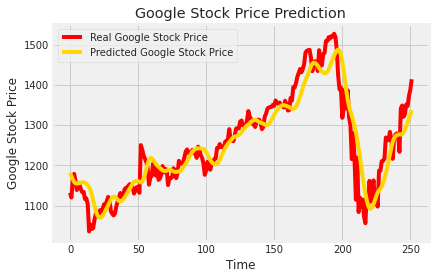

In [32]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(goog_pred, color = 'gold', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


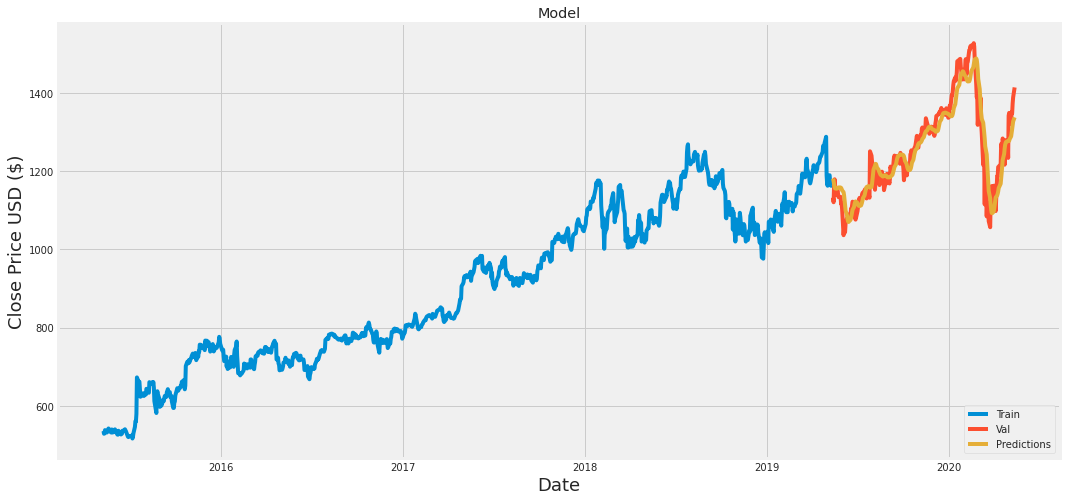

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = goog_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:
valid

,Close,Predictions
Date,,
2019-05-13,1132.030029,1180.951416
2019-05-14,1120.439941,1173.235229
2019-05-15,1164.209961,1165.543213
2019-05-16,1178.979980,1159.177368
2019-05-17,1162.300049,1155.652954
...,...,...
2020-05-05,1351.109985,1297.466797
2020-05-06,1347.300049,1307.072754
2020-05-07,1372.560059,1316.832397


In [35]:
rmse_goog = np.sqrt(np.mean(((goog_pred- goog_y_test) ** 2)))
rmse_goog

42.66586594245751

**Microsoft Price**

In [36]:
data = MSFT.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_msft = scaler.fit_transform(dataset)
scaled_msft

array([[0.04654927],
       [0.04641434],
       [0.04830331],
       ...,
       [0.96559407],
       [0.97287995],
       [0.99062268]])

In [37]:
train_data = scaled_msft[0:int(training_data_len), :]
msft_x_train = []
msft_y_train = []

for i in range(60, len(train_data)):
    msft_x_train.append(train_data[i-60:i, 0])
    msft_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
msft_x_train, msft_y_train = np.array(msft_x_train), np.array(msft_y_train)
#Reshape the data
msft_x_train = np.reshape(msft_x_train, (msft_x_train.shape[0], msft_x_train.shape[1], 1))
print(msft_x_train.shape, msft_y_train.shape)

(948, 60, 1) (948,)


In [44]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (msft_x_train.shape[1], 1)))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(25))
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 10, batch_size = 6)

Epoch 1/10
948/948 [==============================] - 20s 21ms/step - loss: 0.0084
Epoch 2/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0026
Epoch 3/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0021
Epoch 4/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0022
Epoch 5/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0018
Epoch 6/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0021
Epoch 7/10
948/948 [==============================] - 18s 20ms/step - loss: 0.0021
Epoch 8/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0019
Epoch 9/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0016
Epoch 10/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0018


In [0]:
#create test data set
test_data = scaled_msft[training_data_len - 60: , :]
#Create the data sets x_test and y_test
msft_x_test = []
msft_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    msft_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
msft_x_test = np.array(msft_x_test)
msft_x_test = np.reshape(msft_x_test, (msft_x_test.shape[0], msft_x_test.shape[1], 1 ))
msft_pred = regressor.predict(msft_x_test)
msft_pred = scaler.inverse_transform(msft_pred)

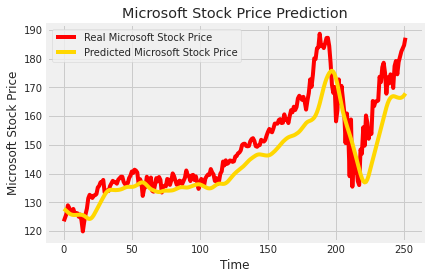

In [46]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(msft_pred, color = 'gold', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


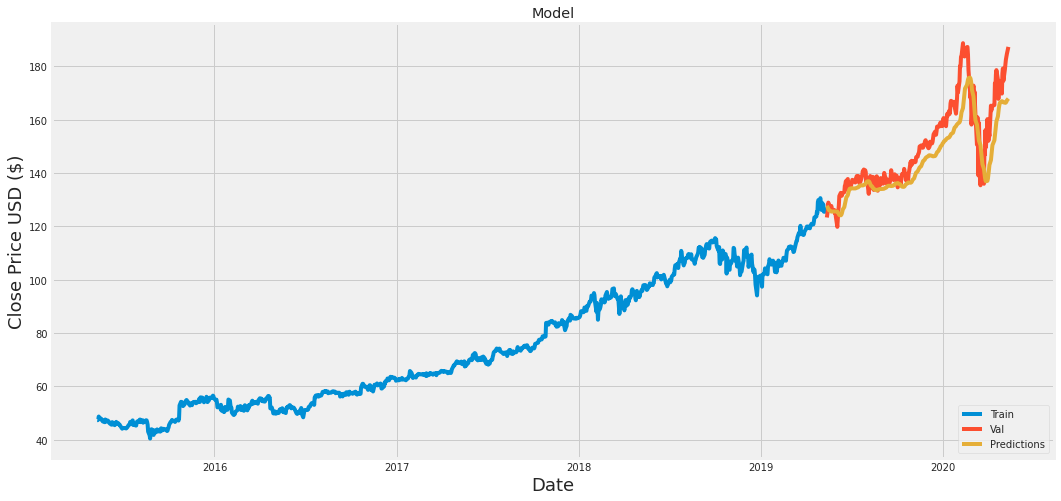

In [47]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = msft_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
valid

,Close,Predictions
Date,,
2019-05-13,123.349998,127.698120
2019-05-14,124.730003,127.371170
2019-05-15,126.019997,126.952072
2019-05-16,128.929993,126.499672
2019-05-17,128.070007,126.110245
...,...,...
2020-05-05,180.759995,166.344650
2020-05-06,182.539993,166.442963
2020-05-07,183.600006,166.732361


In [49]:
rmse_msft = np.sqrt(np.mean(((msft_pred- msft_y_test) ** 2)))
rmse_msft

8.408532355975849

**Amazon Price**

In [50]:
data = AMZN.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_amzn = scaler.fit_transform(dataset)
scaled_amzn

array([[0.00542809],
       [0.00453639],
       [0.00251427],
       ...,
       [0.9481604 ],
       [0.95400753],
       [0.97318961]])

In [51]:
train_data = scaled_amzn[0:int(training_data_len), :]
amzn_x_train = []
amzn_y_train = []

for i in range(60, len(train_data)):
    amzn_x_train.append(train_data[i-60:i, 0])
    amzn_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
amzn_x_train, amzn_y_train = np.array(amzn_x_train), np.array(amzn_y_train)
#Reshape the data
amzn_x_train = np.reshape(amzn_x_train, (amzn_x_train.shape[0], amzn_x_train.shape[1], 1))
print(amzn_x_train.shape, amzn_y_train.shape)

(948, 60, 1) (948,)


In [52]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (amzn_x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'tanh'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(25))
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 10, batch_size = 6)

Epoch 1/10
948/948 [==============================] - 19s 20ms/step - loss: 0.0044
Epoch 2/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0016
Epoch 3/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0013
Epoch 4/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0013
Epoch 5/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0013
Epoch 6/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0010
Epoch 7/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0011
Epoch 8/10
948/948 [==============================] - 18s 19ms/step - loss: 9.1579e-04
Epoch 9/10
948/948 [==============================] - 18s 19ms/step - loss: 0.0012
Epoch 10/10
948/948 [==============================] - 18s 19ms/step - loss: 8.2464e-04


In [0]:
#create test data set
test_data = scaled_amzn[training_data_len - 60: , :]
#Create the data sets x_test and y_test
amzn_x_test = []
amzn_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    amzn_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
amzn_x_test = np.array(amzn_x_test)
amzn_x_test = np.reshape(amzn_x_test, (amzn_x_test.shape[0], amzn_x_test.shape[1], 1 ))
amzn_pred = regressor.predict(amzn_x_test)
amzn_pred = scaler.inverse_transform(amzn_pred)

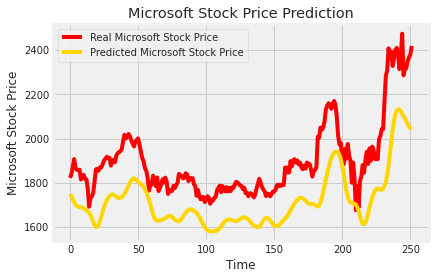

In [54]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(amzn_pred, color = 'gold', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


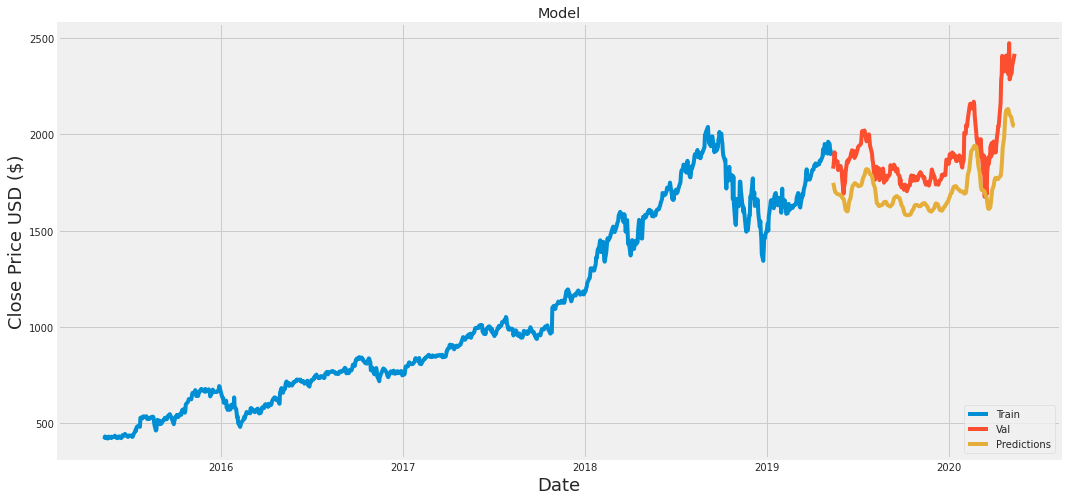

In [55]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = amzn_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [56]:
valid

,Close,Predictions
Date,,
2019-05-13,1822.680054,1748.860840
2019-05-14,1840.119995,1739.553833
2019-05-15,1871.150024,1726.433105
2019-05-16,1907.569946,1712.499878
2019-05-17,1869.000000,1701.792603
...,...,...
2020-05-05,2317.800049,2079.574951
2020-05-06,2351.260010,2066.412354
2020-05-07,2367.610107,2054.515869


In [57]:
rmse_amzn = np.sqrt(np.mean(((amzn_pred- amzn_y_test) ** 2)))
rmse_amzn

194.64897072297705